In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import signal as sg
from numba import jit


In [2]:
A = np.array([[1,0],[1,1],[0,0.5]])

In [3]:
np.linalg.pinv(A)

array([[ 0.83333333,  0.16666667, -0.33333333],
       [-0.66666667,  0.66666667,  0.66666667]])

In [325]:
N = 51
N = 101

x = np.linspace(-30,30,num=N)
X,Y = np.meshgrid(x,x)

# x = np.linspace(- 5,5,num=N)
# X,Y = np.meshgrid(x,x)

# N = 25
# x = np.linspace(-15,15,num=N)
# X,Y = np.meshgrid(x,x)

In [326]:
X = X.reshape((N,N))
Y = Y.reshape((N,N))

In [327]:
r = 1.5
s = 1
kis = 2
KE = np.exp(-0.5*(X**2+Y**2)/s**2)
KE = KE/np.max(KE.ravel())
KI = np.exp(-0.5*(X**2+Y**2)/(s)**2)
KI = KI/np.max(KI.ravel())
# KI = np.exp(-0.5*(np.sqrt(X**2+Y**2) - r)**2/(s**2)) 
KEI = np.exp(-0.5*(X**2+Y**2)/((kis*s)**2))-0*0.95*KE
KEI = np.where(KEI<=0,1*KEI,KEI)
KEI = KEI/np.sum(KEI.ravel())
KE = KE/np.sum(KE.ravel())
KI = KI/np.sum(KI.ravel())
UE = X**2+Y**2 < 1**2

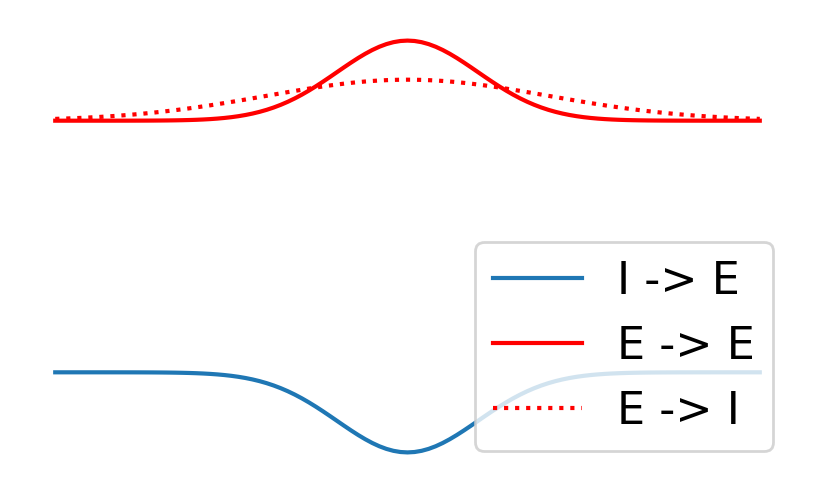

In [322]:
plt.figure(dpi=200,figsize=(5,3))
plt.plot(x,-KI[N//2,:]-.005,label = 'I -> E')
plt.plot(x,KE[N//2,:],'r',label = 'E -> E')
plt.plot(x,KEI[N//2,:]*2,':r',label = 'E -> I')
plt.axis('off')
plt.legend(loc="lower right")
plt.savefig('pannelA.svg')

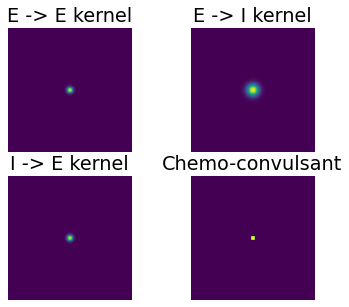

In [328]:
%matplotlib inline
plt.figure(figsize=(6,5))

plt.rc('font', size=16)
plt.subplot(2,2,1)
plt.imshow(KE)
plt.title("E -> E kernel")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(KEI)
plt.title("E -> I kernel")
plt.axis('off')
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(KI)
plt.title("I -> E kernel")
plt.axis('off')
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(UE)
plt.title("Chemo-convulsant")
plt.axis('off')
plt.yticks([])
# plt.subplot(1,5,5)
# plt.plot(x,KE[N//2,:])
# plt.plot(x,KI[N//2,:])
# plt.plot(x,KEI[N//2,:])
plt.savefig('pannelA2.svg')

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
plt.imshow(KE)
plt.title("Excitatory-Excitatory kernel")
plt.subplot(1,5,2)
plt.imshow(KEI)
plt.title("Excitatory-Inhibitory kernel")
plt.subplot(1,5,3)
plt.imshow(KI)
plt.title("Inhibitory-Excitatory kernel")
plt.subplot(1,5,4)
plt.imshow(UE)
plt.title("Chemo-convulsant")
plt.subplot(1,5,5)
plt.plot(x,KE[N//2,:])
plt.plot(x,KI[N//2,:])
plt.plot(x,KEI[N//2,:])


Parameter Inhibitory interneurons Pyramidal cells
Capacitance*, 𝑪 84 pF 150 pF
Leak reversal potential*, 𝑽 𝑳 -62 mV -65 mV
Leak conductance*, 𝒈 𝑳 84/12 nS (pF/ms) 150/30 nS (pF/ms)
Threshold voltage*, 𝑽 𝒕𝒉 -55 mV -48 mV
Refractory time*, 𝑻 𝒓 1 ms 8 ms
Reset voltage, 𝑽 𝒓 -70 mV -70 mV
AMPA reversal potential, 𝑽 𝑨𝑴𝑷𝑨 0 mV 0 mV
AMPA time constant, 𝑻 𝑨𝑴𝑷𝑨 16 ms 16 ms
GABA reversal potential, 𝑽 𝑮𝑨𝑩𝑨 -70 mV -70 mV
GABA time constant, 𝑻 𝑮𝑨𝑩𝑨 5 ms 5 ms
Diffusion term, 𝟏
𝟐 𝝈 𝟐 2000 mV 2 /s 1000 mV 2 /s
Efferent conduction delay 1 ms 1 ms

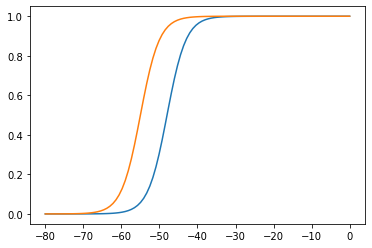

In [8]:
class I:
    C  = 84 #pF
    Vl = -62 #mV
    gl = 84/12 # nS (pF/ms)
    Vt = -55 #mV
    Vt2 = -0
    Ve = 0 #mv
#     te = 16 #ms
    Vi = -70 #mV
    ti = 80 #ms
    s  = 2.5 #mV
    ke = 3 #4
    ki = 0
    ft = 20000 # fatigue timescale
    rt = 200000 # recovery timescale
    ku = 4
    
    
class E:
    C  = 150 #pF
    Vl = -65 #mV
    gl = 150/30 # nS (pF/ms)
    Vt = -48 -0#mV
    Ve = 0 #mv
    te = 16 #ms
    Vi = -70 #mV
#     ti = 30 #ms
    s  = 2.5 #mV
    ki = 100
    ke = 20
    ku = 4
    
    
v = np.linspace(-80,0,100)
plt.figure()
Fe = lambda v:1/(1+np.exp(-(v-E.Vt)/E.s))
Fi = lambda v,f :1/(1+np.exp(-(v-(f*I.Vt + (1-f)*I.Vt2))/I.s))
plt.plot(v,Fe(v))
plt.plot(v,Fi(v,1+0*v))

Text(0.5, 1.0, 'Conductances')

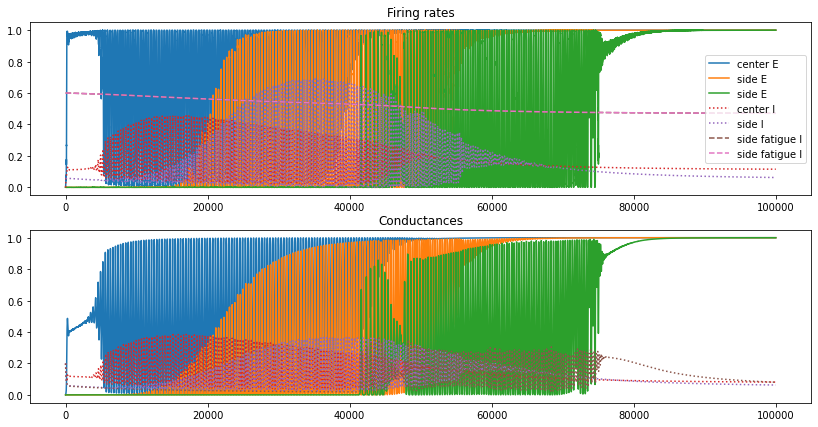

In [9]:
# Initialization
# def simulate():
dt = 1
Ndt = 100000
Vet = np.zeros((*X.shape,Ndt))
Vit = np.zeros((*X.shape,Ndt))
Get = np.zeros((*X.shape,Ndt))
Geit = np.zeros((*X.shape,Ndt))
Git = np.zeros((*X.shape,Ndt))
Ift = np.zeros((*X.shape,Ndt))  # Interneuron fatigue


Vet[:,:,0] = E.Vl*np.ones(X.shape)
Vit[:,:,0] = I.Vl*np.ones(X.shape)
Get[:,:,0] = np.zeros(X.shape)
Geit[:,:,0] = np.zeros(X.shape)
Git[:,:,0] = 0.2 *np.ones(X.shape)
Ift[:,:,0] = 1 *np.ones(X.shape) - UE*(.4)

# Simulation
for i in range(Ndt-1):
    print(f'step {i+1} of {Ndt-1}',end = '\r')
    Ve = Vet[:,:,i]
    Vi = Vit[:,:,i]
    Ge = Get[:,:,i]
    Gei = Geit[:,:,i]
    Gi = Git[:,:,i]
    If = Ift[:,:,i]

    dVe = dt/E.C*(E.ke*Ge*(E.Ve - Ve) + E.ki*Gi*(E.Vi-Ve) + E.gl*(E.Vl-Ve) + E.ku*UE*(E.Ve - Ve)) + np.random.randn(*X.shape)*.3
    dVi = dt/I.C*(I.ke*Gei*(I.Ve - Vi) + I.ki*Gi*(I.Vi-Vi) + I.gl*(I.Vl-Vi) + I.ku*UE*(I.Ve - Vi))
#     bound = 'wrap'
#     dGe = dt*(sg.convolve2d(KE,1/(1+np.exp(-(Ve-E.Vt)/E.s)),mode='same',boundary = bound)-Ge)/E.te
#     dGei = dt*(sg.convolve2d(KEI,1/(1+np.exp(-(Ve-E.Vt)/E.s)),mode='same',boundary = bound)-Gei)/E.te

    dGe = dt*(sg.fftconvolve(KE,1/(1+np.exp(-(Ve-E.Vt)/E.s)),mode='same')-Ge)/E.te
    dGei = dt*(sg.fftconvolve(KEI,1/(1+np.exp(-(Ve-E.Vt)/E.s)),mode='same')-Gei)/E.te

    Ifr = 1/(1+np.exp(-(Vi-((If)*I.Vt + (1-If)*I.Vt2))/I.s))
#     dGi = dt*(sg.convolve2d(KI,Ifr,mode='same',boundary = bound)-Gi)/I.ti
    dGi = dt*(sg.fftconvolve(KI,Ifr,mode='same')-Gi)/I.ti
    dIf = dt*((1-If)/I.rt - If/I.ft*Ifr)


    Vet[:,:,i+1] = Ve + dVe
    Vit[:,:,i+1] = Vi + dVi
    Get[:,:,i+1] = Ge + dGe
    Geit[:,:,i+1] = Gei + dGei
    Git[:,:,i+1] = Gi + dGi
    Ift[:,:,i+1] = If + dIf


plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(Fe(Vet[N//2,N//2,:]),label = 'center E')
plt.plot(Fe(Vet[N//5*2,N//2,:]),label = 'side E')
plt.plot(Fe(Vet[N//8,N//2,:]),label = 'side E')
plt.plot(Fi(Vit[N//2,N//2,:],Ift[N//2,N//2,:]),':',label = 'center I')
plt.plot(Fi(Vit[N//5*2,N//2,:],Ift[N//5*2,N//2,:]),':',label = 'side I')

plt.plot(Ift[N//2,N//2,:],'--',label = 'side fatigue I')
plt.plot(Ift[N//2,N//2,:],'--',label = 'side fatigue I')
plt.legend()

plt.title('Firing rates')
plt.subplot(2,1,2)
plt.plot(Get[N//2,N//2,:])
plt.plot(Get[N//5*2,N//2,:])
plt.plot(Get[N//8,N//2,:])
plt.plot(Git[N//2,N//2,:],':')
plt.plot(Git[N//5*2,N//2,:],':')
plt.plot(Git[N//8,N//2,:],':')
plt.title('Conductances')

In [10]:
# %prun simulate()

(0.0, 1.01)

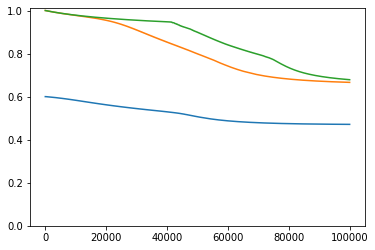

In [11]:
plt.figure()

# plt.plot(Fi(Ift[N//2,N//2,:]),'--',label = 'side fatigue I')
plt.plot(Ift[N//2,N//2,:],label = 'center fi')
plt.plot(Ift[N//5*2,N//2,:],label = 'side fi')
plt.plot(Ift[N//8,N//2,:],label = 'side fi')
plt.ylim([0,1.01])

<IPython.core.display.Javascript object>


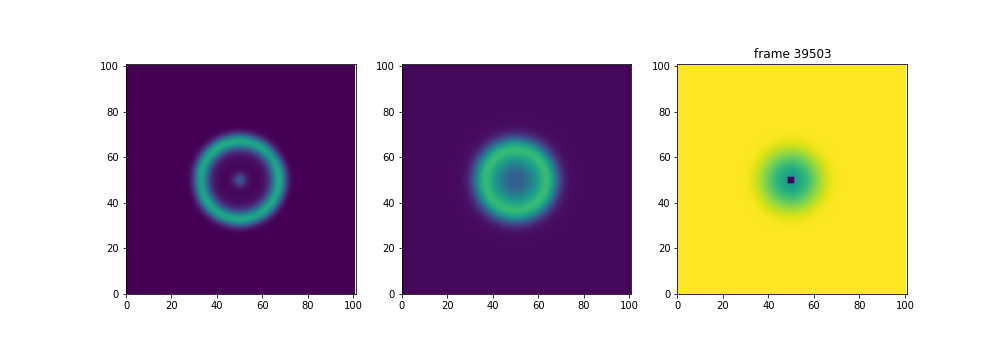

In [216]:
%matplotlib notebook
fig, ax = plt.subplots(1,3,figsize = (14,5))

for a in ax:
    a.set_xlim((0, N))
    a.set_ylim((0, N))

    
s = 39250 
f = 41000
data1 = Get[:,:,s:f]
data2 = Git[:,:,s:f]
data3 = Ift[:,:,s:f]

im1 = ax[0].imshow(data1[:,:,0],vmin=np.min(data1), vmax= np.max(data1))
im2 = ax[1].imshow(data2[:,:,0],vmin=np.min(data2), vmax= np.max(data2))
im3 = ax[2].imshow(data3[:,:,0],vmin=np.min(data3), vmax= np.max(data3))

def init():
    im1.set_data(data1[:,:,0])
    im2.set_data(data2[:,:,0])
    im3.set_data(data3[:,:,0])
    return (im1,im2,im3)

# animation function. This is called sequentially
def animate(i):
    data_slice1 = data1[:,:,i]
    im1.set_data(data_slice1)
    data_slice2 = data2[:,:,i]
    im2.set_data(data_slice2)
    data_slice3 = data3[:,:,i]
    im3.set_data(data_slice3)
    plt.title(f'frame {i+s}')
    return (im1,im2,im3)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=data1.shape[2], interval=1, blit=True,)

In [13]:


# f = r"animation.mp4" 
# writervideo = animation.FFMpegWriter(fps=60) 
# anim.save(f, writer=writervideo)



<IPython.core.display.Javascript object>


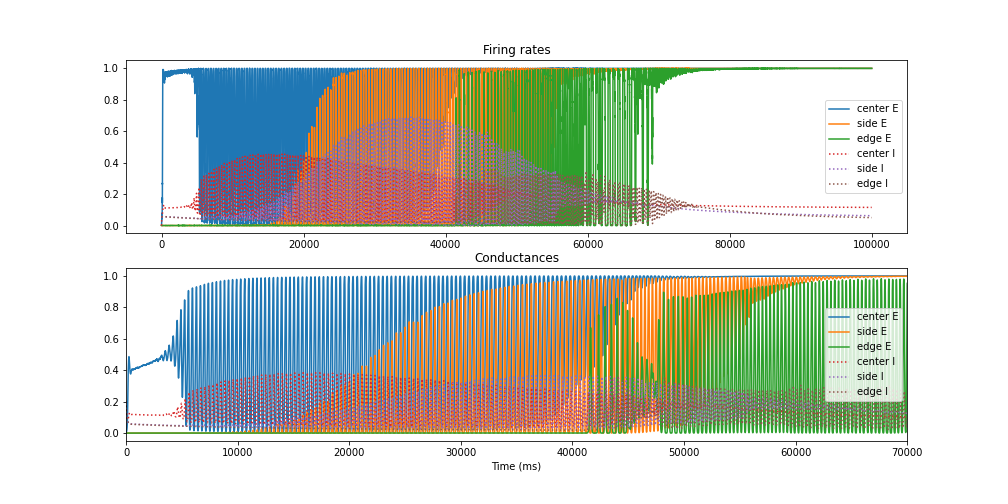

Text(0.5, 0, 'Time (ms)')

In [135]:

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(Fe(Vet[N//2,N//2,:]),label = 'center E')
plt.plot(Fe(Vet[N//5*2,N//2,:]),label = 'side E')
plt.plot(Fe(Vet[N-1,N//2,:]),label = 'edge E')
plt.plot(Fi(Vit[N//2,N//2,:],Ift[N//2,N//2,:]),':',label = 'center I')
plt.plot(Fi(Vit[N//5*2,N//2,:],Ift[N//5*2,N//2,:]),':',label = 'side I')
plt.plot(Fi(Vit[N-1,N//2,:],Ift[N-1,N//2,:]),':',label = 'edge I')

# plt.plot(Ift[N//2,N//2,:],'--',label = 'side fatigue I')
# plt.plot(Ift[N//2,N//2,:],'--',label = 'side fatigue I')
plt.legend()
plt.title('Firing rates')

plt.subplot(2,1,2)
plt.plot(Get[N//2,N//2,:],label = 'center E')
plt.plot(Get[N//5*2,N//2,:],label = 'side E')
plt.plot(Get[N//8,N//2,:],label = 'edge E')
plt.plot(Git[N//2,N//2,:],':',label = 'center I')
plt.plot(Git[N//5*2,N//2,:],':',label = 'side I')
plt.plot(Git[N//8,N//2,:],':',label = 'edge I')

# plt.xlim(0,70000)
plt.legend()
plt.title('Conductances')
plt.xlabel('Time (ms)')

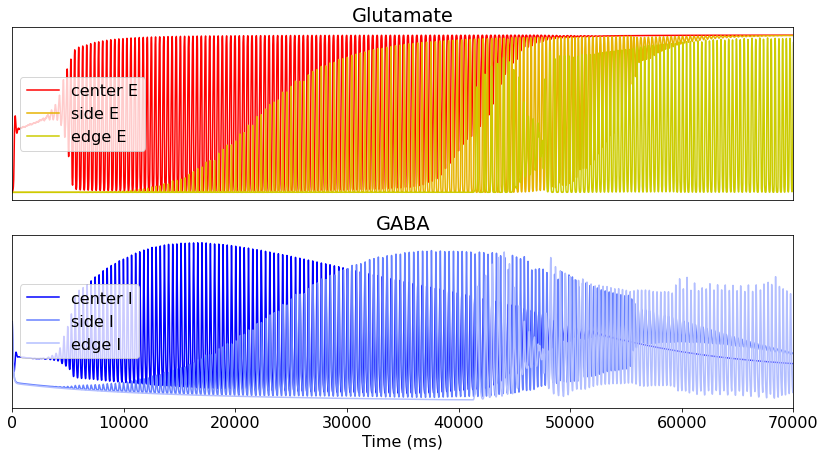

In [330]:

Glu_colors = [[.8,.8,0],[.9,.7,0],[1,0,0]]
GABA_colors = [[.70,.75,1],[.4,.5,1],[0,0,1]]
plt.rc('font', size=16)
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(Get[N//2,N//2,:],label = 'center E',color = Glu_colors[2])
plt.plot(Get[N//5*2,N//2,:],label = 'side E',color = Glu_colors[1])
plt.plot(Get[N//8,N//2,:],label = 'edge E',color = Glu_colors[0])
plt.xlim(0,70000)
plt.xticks([])
plt.yticks([])
plt.legend(loc ='center left')
plt.title('Glutamate')

plt.subplot(2,1,2)
plt.plot(Git[N//2,N//2,:],label = 'center I',color = GABA_colors[2])
plt.plot(Git[N//5*2,N//2,:],label = 'side I',color = GABA_colors[1])
plt.plot(Git[N//8,N//2,:],label = 'edge I',color = GABA_colors[0])

plt.yticks([])
plt.xlim(0,70000)
plt.legend(loc ='center left')
plt.title('GABA')
plt.xlabel('Time (ms)')
plt.savefig('pannelB.svg')

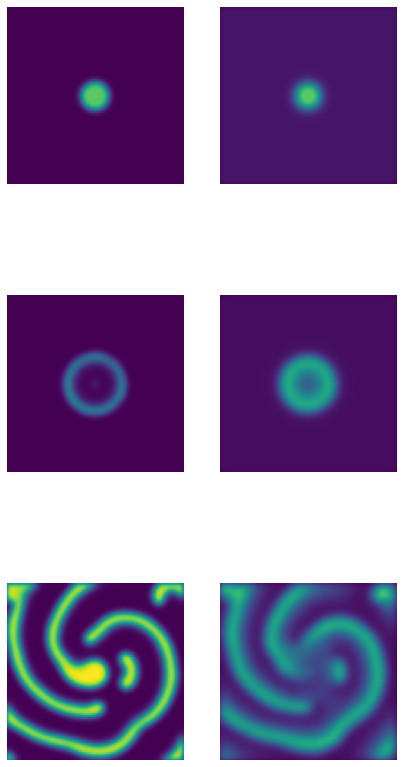

In [331]:
%matplotlib inline
fig, ax = plt.subplots(3,2,figsize = (7,15))

for a1 in ax:
    for a in a1:
        a.set_xlim((0, N))
        a.set_ylim((0, N))
        a.set_axis_off()

    
s = 10 #20000
f = -1
data1 = Get[:,:,s:f]
data2 = Git[:,:,s:f]
data3 = Ift[:,:,s:f]

im1 = ax[0,0].imshow(data1[:,:,15100],vmin=np.min(data1), vmax= np.max(data1))
im2 = ax[0,1].imshow(data2[:,:,15100],vmin=np.min(data2), vmax= np.max(data2))

im1 = ax[1,0].imshow(data1[:,:,35200],vmin=np.min(data1), vmax= np.max(data1))
im2 = ax[1,1].imshow(data2[:,:,35200],vmin=np.min(data2), vmax= np.max(data2))

im1 = ax[2,0].imshow(data1[:,:,50000],vmin=np.min(data1), vmax= np.max(data1))
im2 = ax[2,1].imshow(data2[:,:,50000],vmin=np.min(data2), vmax= np.max(data2))
plt.savefig('pannelC.svg')

In [144]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [75]:
import importlib

In [90]:
import stfio_plot as stf
importlib.reload(stf)

<module 'stfio_plot' from '/home/mfpleite/Documents/yoshi backup/stfio_plot.py'>

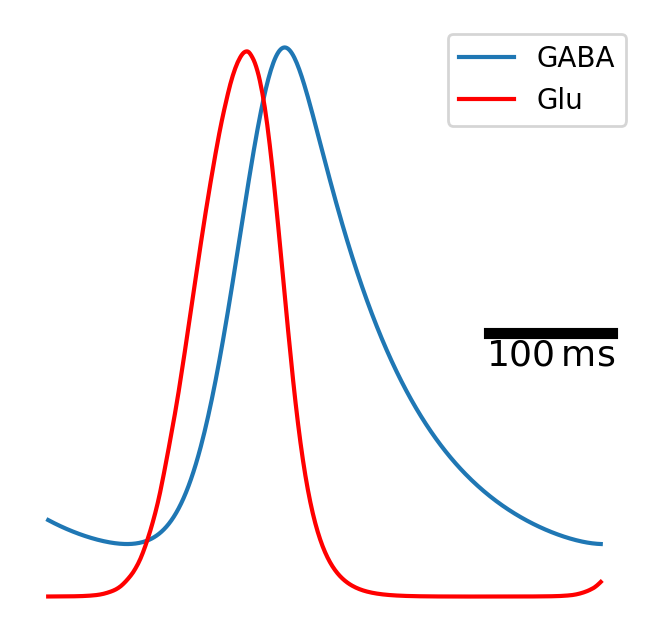

In [332]:
fig, ax = plt.subplots(1,1,figsize = (4,4),dpi=200)
ax.plot(Git[N//5*2,N//2,27150:27600],label = 'GABA')
# plt.plot(Git[N//8,N//2,:],':')
ax.plot(Get[N//5*2,N//2,27150:27600]/2.7,'r',label = 'Glu')
# plt.plot(Git[N//2,N//2,:],':')
ax.legend()
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
# ax.set_xlim(27150,27600)
stf.plot_scalebars(ax,xunits='ms',noy=True,linewidth=4, sb_xoff=0., sb_yoff=0.5)
plt.savefig('pannelD.svg')

### Save Sim results

In [16]:
# np.savez('InwardsSpieksToSeizureSpiral.npz', Vet=Vet, Vit=Vit, Get=Get, Geit=Geit, Git=Git,Ift= Ift,)

In [17]:
# data = np.load('InwardsSpieksToSeizureSpiral.npz')
# Vet=data['Vet']
# Vit=data['Vit']
# Get=data['Get']
# Geit=data['Geit']
# Git=data['Git']
# Ift=data['Ift']

### Generate figures

In [335]:
pks = sg.find_peaks(Get[N//2,N//2,:],distance=300)[0]

Text(0.5, 1.0, 'Conductances')

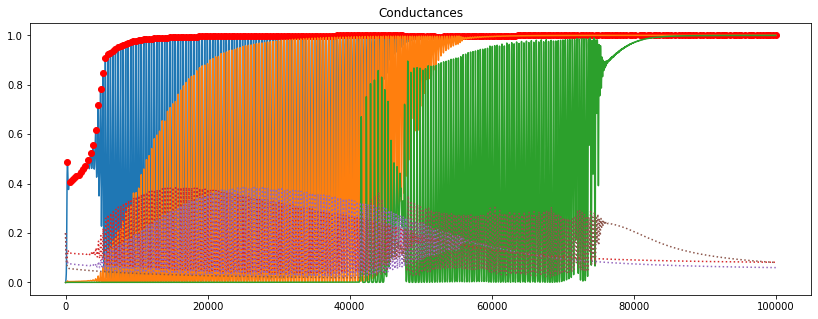

In [336]:
# 39250

s = 0
f = Ndt

pks2 = pks[np.where(np.logical_and(pks>s,pks<f))]

plt.figure(figsize=(14,5))
plt.plot(Get[N//2,N//2,s:f])
plt.plot(pks2-s,Get[N//2,N//2,pks2],'ro')
plt.plot(Get[4*N//9,N//2,s:f])
plt.plot(Get[N//8,N//2,s:f])
plt.plot(Git[N//2,N//2,s:f],':')
# plt.plot(Git[N//2-2,N//2,s:f],':')
plt.plot(Git[4*N//9,N//2,s:f],':')
plt.plot(Git[N//8,N//2,s:f],':')
plt.title('Conductances')

In [337]:
4*N//9

44

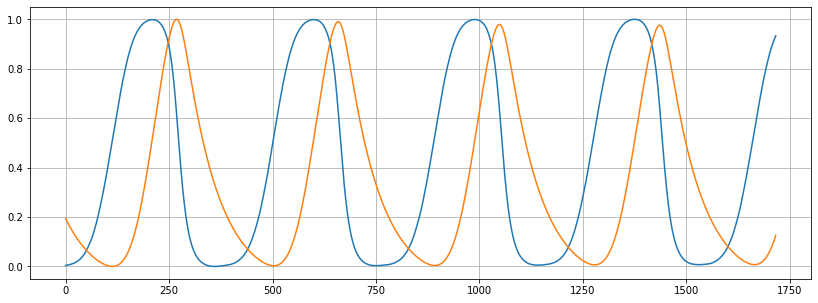

In [338]:
r=3
c=N//2+6
wdata1 = Get[c-r:c+r,N//2-r:N//2+r,39250:40967]
wdata2 = Git[c-r:c+r,N//2-r:N//2+r,39250:40967]
glu = np.sum(wdata1,axis=(0,1))
glu=glu-np.min(glu)
glu=glu/np.max(glu)

GABA = np.sum(wdata2,axis=(0,1))
GABA=GABA-np.min(GABA)
GABA=GABA/np.max(GABA)

plt.figure(figsize=(14,5))
plt.plot(glu)
plt.plot(GABA)
plt.grid()

In [339]:
wdata1

array([[[2.96726014e-02, 3.02076208e-02, 3.07292542e-02, ...,
         9.89112485e-01, 9.89771606e-01, 9.90390654e-01],
        [5.88947938e-02, 5.98608474e-02, 6.08116739e-02, ...,
         9.94085434e-01, 9.94438875e-01, 9.94769973e-01],
        [8.85390370e-02, 8.98923465e-02, 9.12392377e-02, ...,
         9.96196389e-01, 9.96417262e-01, 9.96623493e-01],
        [1.01165540e-01, 1.02654370e-01, 1.04154774e-01, ...,
         9.96847053e-01, 9.97026649e-01, 9.97193818e-01],
        [8.80492486e-02, 8.93388735e-02, 9.06568453e-02, ...,
         9.96443498e-01, 9.96648783e-01, 9.96839949e-01],
        [5.82453155e-02, 5.91198826e-02, 6.00278943e-02, ...,
         9.94673992e-01, 9.94990689e-01, 9.95286642e-01]],

       [[1.13239529e-02, 1.15410735e-02, 1.17537173e-02, ...,
         9.78175987e-01, 9.79483484e-01, 9.80716236e-01],
        [2.21141919e-02, 2.25160759e-02, 2.29146457e-02, ...,
         9.86769124e-01, 9.87569946e-01, 9.88322718e-01],
        [3.30677486e-02, 3.36360987e-0

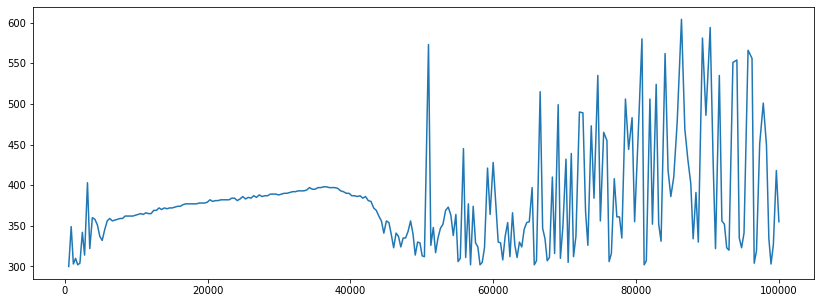

In [340]:
plt.figure(figsize=(14,5))
# plt.plot(np.sum(Get[:,:,:],axis =(0,1)))
# plt.plot(np.sum(Get[:,:,:],axis =(0,1)))
plt.plot(pks[1:],np.diff(pks))

In [341]:
min(np.diff(pks))

300

In [342]:
w = 500
Nmax = Ndt//w - 1
GetM = np.zeros((*X.shape,Nmax))
GitM = np.zeros((*X.shape,Nmax))
for i in range(Nmax):
    GetM[:,:,i] = np.max(Get[:,:,w*i:w*i+w],axis = 2)
    GitM[:,:,i] = np.max(Git[:,:,w*i:w*i+w],axis = 2)

<IPython.core.display.Javascript object>


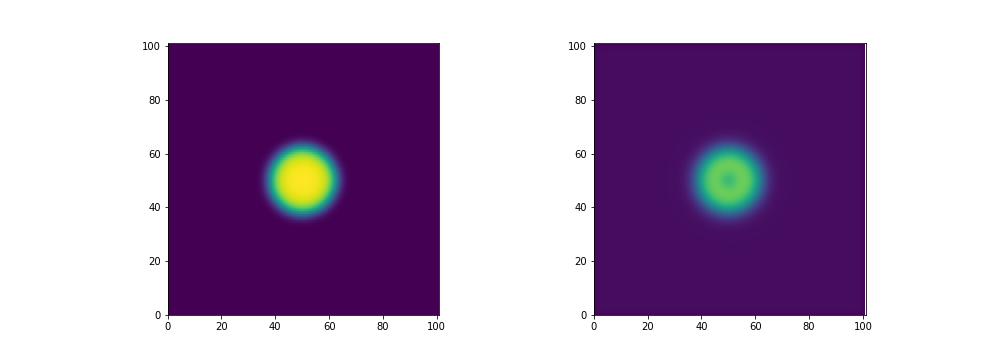

In [343]:
%matplotlib notebook
fig, ax = plt.subplots(1,2,figsize = (14,5))

for a in ax:
    a.set_xlim((0, N))
    a.set_ylim((0, N))

    


s =40
f = 100
data1 = GetM[:,:,s:f]
data2 = GitM[:,:,s:f]

im1 = ax[0].imshow(data1[:,:,0],vmin=np.min(data1), vmax= np.max(data1))
im2 = ax[1].imshow(data2[:,:,0],vmin=np.min(data2), vmax= np.max(data2))

def init():
    im1.set_data(data1[:,:,0])
    im2.set_data(data2[:,:,0])
    return (im1,im2)

# animation function. This is called sequentially
def animate(i):
    data_slice1 = data1[:,:,i]
    im1.set_data(data_slice1)
    data_slice2 = data2[:,:,i]
    im2.set_data(data_slice2)
    ax[0].set_title(f'frame {i+s}')
    return (im1,im2,im3)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=data1.shape[2], interval=250, blit=True)

In [344]:
f

100

<IPython.core.display.Javascript object>


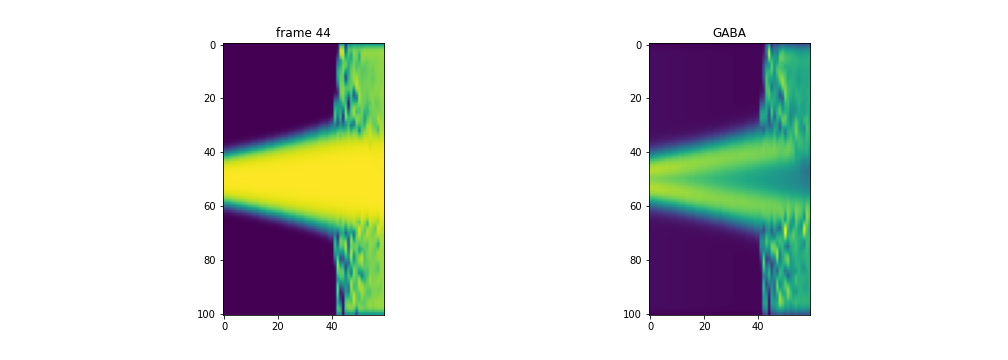

Text(0.5, 1.0, 'GABA')

In [345]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
ax[0].imshow(GetM[N//2,:,s:f])
plt.title('Glu')
# ax[0].hlines([4*N//9,N//3],0,N,'w')
ax[1].imshow(GitM[N//2,:,s:f])
plt.title('GABA')
# ax[1].hlines([4*N//9,N//3],0,N,'w')

In [347]:
f-s

60

<IPython.core.display.Javascript object>


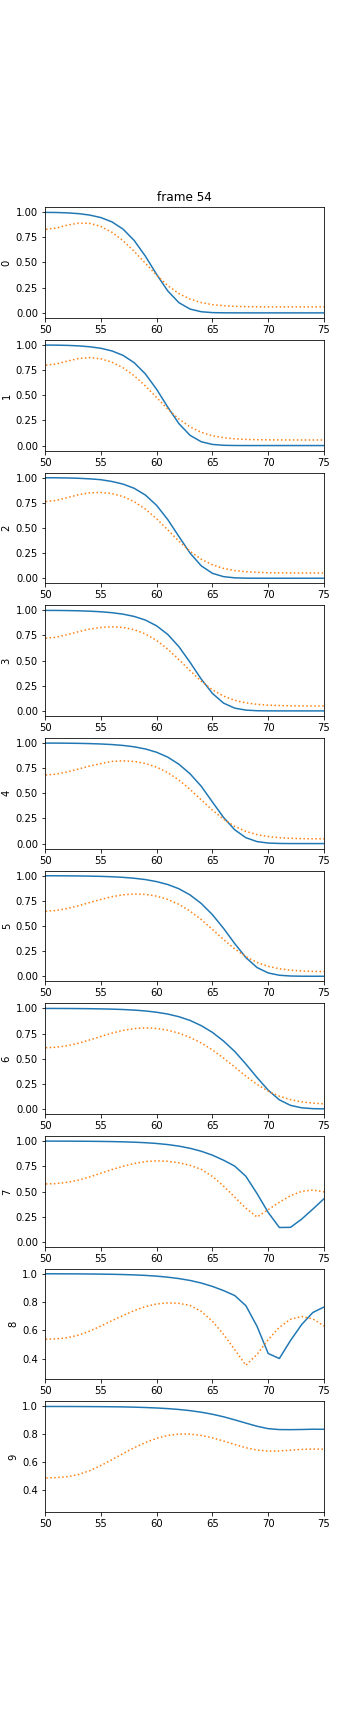

In [348]:
fig, ax = plt.subplots(10,1,figsize = (5,24))

for i in range(10):
    ax[i].plot(GetM[N//2,:,i*(f-s)//10+s])
    ax[i].plot(GitM[N//2,:,i*(f-s)//10+s]/np.max(GitM[N//2,:,s:f:5]),':')
    ax[i].set_xlim(N//2,3*N//4)
    ax[i].set_ylabel(i)

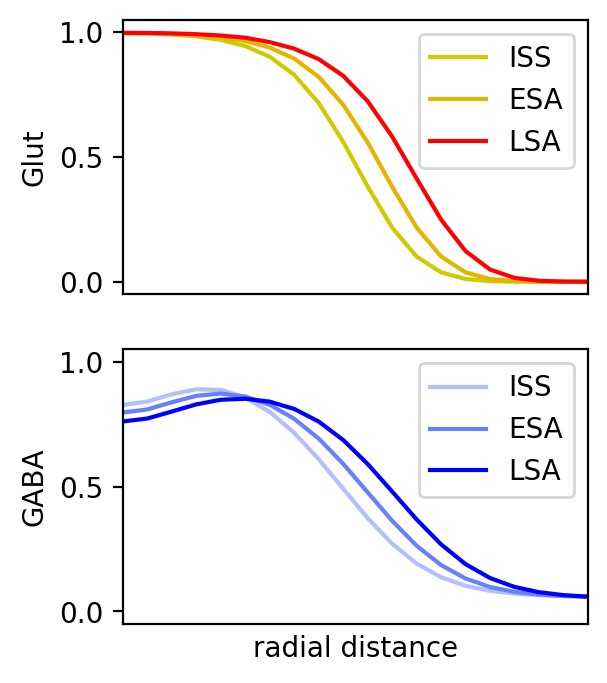

In [350]:
%matplotlib inline
fig, ax = plt.subplots(2,1,figsize = (3,4),dpi=200)

Glu_colors = [[.8,.8,0],[.9,.7,0],[1,0,0]]
GABA_colors = [[.70,.75,1],[.4,.5,1],[0,0,1]]
labels = ['ISS','ESA','LSA']

for i in range(3):
    ax[0].plot(GetM[N//2,:,i*(f-s)//10+s],color=Glu_colors[i],label=labels[i])
    ax[0].set_xlim(N//2,5.5*N//8)
    ax[0].set_xticks([])
    ax[0].set_ylim(-0.05,1.05)
    ax[0].set_ylabel('Glut')
    ax[0].legend()
    
    ax[1].plot(GitM[N//2,:,i*(f-s)//10+s]/np.max(GitM[N//2,:,s:f:5]),color=GABA_colors[i],label=labels[i])
    ax[1].set_xlim(N//2,5.5*N//8)
    ax[1].set_ylim(-0.05,1.05)
    ax[1].set_ylabel('GABA')
    ax[1].set_xticks([])
    ax[1].set_xlabel('radial distance')
    ax[1].legend()

fig.savefig('pannelE.svg')

In [ ]:

ax.plot(Git[N//5*2,N//2,27150:27600],label = 'GABA')
# plt.plot(Git[N//8,N//2,:],':')
ax.plot(Get[N//5*2,N//2,27150:27600]/2.7,'r',label = 'Glu')
# plt.plot(Git[N//2,N//2,:],':')
ax.legend()
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
# ax.set_xlim(27150,27600)
stf.plot_scalebars(ax,xunits='ms',noy=True,linewidth=4, sb_xoff=0., sb_yoff=0.5)

<IPython.core.display.Javascript object>


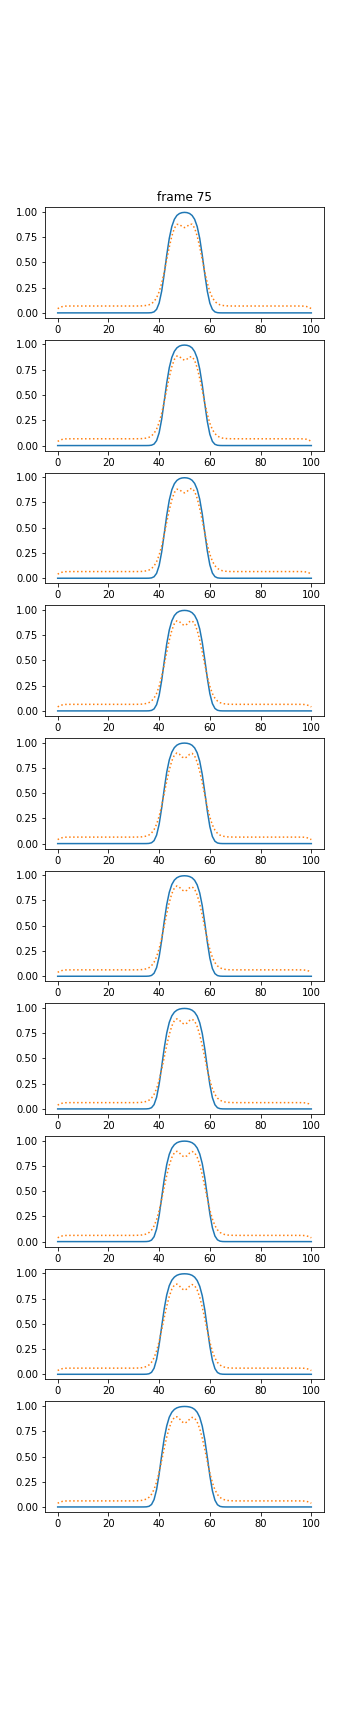

In [32]:
fig, ax = plt.subplots(10,1,figsize = (5,24))
s=30
for i in range(10):
    ax[i].plot(GetM[N//2,:,i+s])
    ax[i].plot(GitM[N//2,:,i+s]/np.max(GitM[N//2,:,s:f:5]),':')

<IPython.core.display.Javascript object>


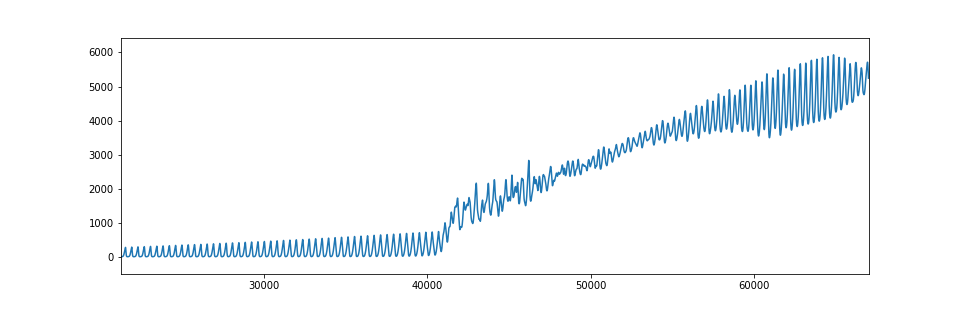

In [30]:
plt.figure()
plt.plot( np.sum(Get,axis=(0,1)))

In [31]:
lfp =

SyntaxError: invalid syntax (545708334.py, line 1)

In [ ]:
lfp.shape
